# Финальный проект по курсу "Сбор данных с Web-scraping и API для социально-научных исследований", 2023-2024 гг.

#### *Проект выполнили студентки 4 курса ОП "Политология" <br> Бойцова Анастасия, Дячок Дарья*

Проект заключается в сборе данных музыкальных рейтингов за период с 2020 года по сегодняшний день и составлении базы данных с текстами самых популярных композиций последних лет для последующего их анализа. Цель проекта состоит в ответе на следующий вопрос: 
> "Как изменились музыкальные предпочтения российского слушателя на фоне социально-политических событий последних лет?" 

Данные парсились при помощи методов <u>Selenium</u> c сайтов [Apple Music](https://music.apple.com/ru/browse) и [Genius](https://genius.com/): Подробнее о цели проекта и соотношении с социальными науками можно прочитать [по ссылке](https://docs.google.com/document/d/16dVCcUWZtEaOPDfabYvcyMh4dVktnthblbVTIEl-9-c/edit?usp=sharing).


***

## Часть 3. Анализ данных

### Шаг 1. 

Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd # для работы с таблицами и датафреймами
import re # для регулярных выражений

# для графиков
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from wordcloud import WordCloud


# для обработки текстовых данных
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from langdetect import detect
from collections import Counter
from gensim import corpora
from gensim.models import LdaModel
import pymorphy2
from pymorphy2 import MorphAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anastasiabojcova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ModuleNotFoundError: No module named 'pymorphy2'

In [143]:
# необходима установка

# ! pip install langdetect
# ! pip install pymorphy2
# ! pip install -U pymorphy2-dicts-ru
# ! pip install gensim
# ! pip install wordcloud
# ! pip install textblob

### Шаг 2. 

Откроем файл <font color='red'>'ПРОЕКТ_собранные_Данные.xlsx'</font>, который мы создали по итогам предыдущего шага (см. файл *ПРОЕКТ_Бойцова, Дячок_Сбор и обработка данных.ipynb*). 

In [42]:
data_xlsx = pd.read_excel('ПРОЕКТ_собранные_Данные.xlsx')
data = pd.DataFrame(data_xlsx, columns=['Номер в рейтинге', 'Название трека', 'Исполнитель', 
                       'Дата выхода', 'Год вхождения в топ', 'Длительность', 
                       'Ненормативный контент', 'Сингл-трек', 'Текст песни', 
                       'Ссылка на прослушивание', 'Ссылка на текст'])

data

,Номер в рейтинге,Название трека,Исполнитель,Дата выхода,Год вхождения в топ,Длительность,Ненормативный контент,Сингл-трек,Текст песни,Ссылка на прослушивание,Ссылка на текст
0,1,Последняя Любовь,MORGENSHTERN,2024-03-08 00:00:00,2023,162,1,1,Ты снова куришь снова слёзы на твоих щеках Оп...,https://music.apple.com/ru/song/%D0%BF%D0%BE%D...,https://genius.com/Morgenshtern-last-love-lyrics
1,2,ПОДАРОК,АКУЛИЧ & Молодой Платон,2024-02-16 00:00:00,2023,159,1,1,Захожу на праздник: what the fuck? Диджей полн...,https://music.apple.com/ru/song/%D0%BF%D0%BE%D...,https://genius.com/Akyuliych-and-mp-gift-lyrics
2,3,Царица,ANNA ASTI,2024-01-26 00:00:00,2023,215,0,1,У я Солнце в заход басота в расход Чёрный Ra...,https://music.apple.com/ru/song/%D1%86%D0%B0%D...,https://genius.com/Macan-and-avg-sing-lyrics
3,4,Спой,A.V.G & MACAN,2023-07-14 00:00:00,2023,145,0,1,Все твои романы — тяжёлый вид спорта Каждый бы...,https://music.apple.com/ru/song/%D1%81%D0%BF%D...,https://genius.com/Anna-asti-tsarina-lyrics
4,5,Можно Я С Тобой,AP$ENT,2023-10-20 00:00:00,2023,132,0,1,Улетай… (Пока я в атмосфере словно пепел сго...,https://music.apple.com/ru/song/%D0%BC%D0%BE%D...,https://genius.com/Tdd-and-mona-farewell-lyrics
...,...,...,...,...,...,...,...,...,...,...,...
395,96,Витаминка,Тима Белорусских,2019-01-29 00:00:00,2020,175,0,0,Так беззаботно уходит вдаль наша с тобой жизнь...,https://music.apple.com/ru/song/%D0%B2%D0%B8%D...,https://genius.com/Tima-belorusskih-vitamin-ly...
396,97,ВЕЧЕРиНОЧКА,MONATIK & Вера Брежнева,2020-06-11 00:00:00,2020,238,0,0,Тихие слова линии твоих губ Кругом голова са...,https://music.apple.com/ru/song/%D0%B2%D0%B5%D...,https://genius.com/Monatik-party-lyrics
397,98,А уже фсё,Mitchel,2020-07-07 00:00:00,2020,134,0,1,А уже всё всё всё всё А надо было раньше Говор...,https://music.apple.com/ru/song/%D0%B0-%D1%83%...,https://genius.com/Mitchel-and-and-its-over-ly...
398,99,Пчеловод,RASA,2019-07-02 00:00:00,2020,170,0,1,Ты пчела — я пчеловод А мы любим мёд А мне пов...,https://music.apple.com/ru/song/%D0%BF%D1%87%D...,https://genius.com/Rasa-beekeeper-lyrics


### Шаг 3. Вывод описательных статистик.

Для начала посмотрим на собранные нами данные в слабой привязке к социальным наукам: просто выведем описательные статистики по основным параметрам и посмотрим, какими техническими характеристиками обладают песни, которые попадают в топ.

Так как, в виду особенности собранных данных, непосредственное использование метода *describe()* мало что скажет нам о характеристиках собранного датасета, воспользуемся средствами визуализации и фильтрацией.

In [81]:
# для вывода описательных статистик очистим наш датафрейм от пропусков

df = data[(data['Длительность'] != 'No Data') & (data['Дата выхода'] != 'No Data')]

df.describe()

,Номер в рейтинге,Год вхождения в топ,Ненормативный контент,Сингл-трек
count,386.000000,386.000000,386.000000,386.000000
mean,50.404145,2021.492228,0.290155,0.598446
std,29.037323,1.119458,0.454423,0.490849
min,1.000000,2020.000000,0.000000,0.000000
25%,25.000000,2020.000000,0.000000,0.000000
50%,50.500000,2021.500000,0.000000,1.000000
75%,75.000000,2022.000000,1.000000,1.000000
max,100.000000,2023.000000,1.000000,1.000000


Как мы видим, описательные статистики несут в себе мало содержательной информации в контексте нашего набора данных. 

Тем не менее, они намекают нам на то, что можно было бы обратить внимание на соотношение классов для категорий *'Ненормативный контент'* и *'Сингл-трек'*

In [78]:
data['Ненормативный контент'].value_counts()

0    287
1    113
Name: Ненормативный контент, dtype: int64

In [79]:
data['Сингл-трек'].value_counts()

1    242
0    158
Name: Сингл-трек, dtype: int64

Мы видим, что для обеих категорий присуща несбалансированность классов: так, песни "из топа" в два раза чаще содержат нецензурные выражения и прочий ненормативный контент. Если для сингл-треков несбалансированность классов обуславливается механизмами работы музыкальных сервисов (и индустрии в целом), то такое количество нецензурных выражений в рекреационных формах творчества могут быть исследованы глубже.

Попробуем рассматривать наши данные, разделив их на две группы: данные за 2020-2021 гг. и данные за 2021-2022 гг.
Посмотрим на соотношение количества треков с ненормативным контентом между этими двумя категориями данных.

In [44]:
df_2020_2021 = data[data['Год вхождения в топ'].isin([2020, 2021])]
df_2022_2023 = data[data['Год вхождения в топ'].isin([2022, 2023])]

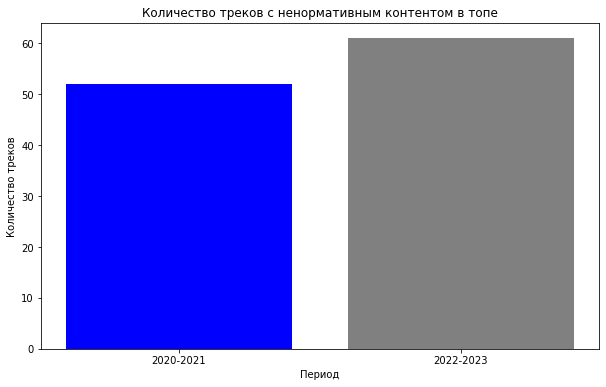

In [82]:
# Подсчет количества треков с ненормативным контентом и среднего номера в рейтинге для 2020-2021
explicit_tracks_count_2020_2021 = df_2020_2021['Ненормативный контент'].sum()

# Подсчет количества треков с ненормативным контентом и среднего номера в рейтинге для 2022-2023
explicit_tracks_count_2022_2023 = df_2022_2023['Ненормативный контент'].sum()

plt.figure(figsize=(10, 6))

plt.bar(['2020-2021', '2022-2023'], [explicit_tracks_count_2020_2021, explicit_tracks_count_2022_2023], color=['blue', 'grey'])
plt.title('Количество треков с ненормативным контентом в топе')
plt.xlabel('Период')
plt.ylabel('Количество треков')

plt.show()

На графике видно, что в последние два года треки с ненормативным контентом чаще, чем в предшествующие им два года, попадают в топ -- и это несмотря на общие тенденции к *формализации* публичной сферы. 

Мы можем также рассмотреть количество попаданий артистов в топ по годам: вдруг там будут "иноагенты"?

In [73]:
artist_counts = data['Исполнитель'].value_counts().head(10)
artist_counts

Скриптонит             19
Miyagi & Andy Panda    19
Artik & Asti           13
Zivert                 13
JONY                   12
HammAli & Navai        10
Miyagi & Эндшпиль      10
ANNA ASTI               8
Егор Крид               8
Баста                   6
Name: Исполнитель, dtype: int64

In [88]:
df_2020_2021['Исполнитель'].value_counts().head(15)

Zivert                 9
Miyagi & Andy Panda    9
Скриптонит             9
JONY                   8
Artik & Asti           7
HammAli & Navai        6
Егор Крид              5
Тима Белорусских       5
Ramil'                 4
MORGENSHTERN           4
SLAVA MARLOW           3
LOBODA                 3
Måneskin               3
Billie Eilish          3
GAYAZOV$ BROTHER$      3
Name: Исполнитель, dtype: int64

In [89]:
df_2022_2023['Исполнитель'].value_counts().head(15)

Miyagi & Andy Panda       10
Скриптонит                10
ANNA ASTI                  8
Miyagi & Эндшпиль          8
Artik & Asti               6
MACAN                      5
JONY                       4
Zivert                     4
HammAli & Navai            4
XOLIDAYBOY                 4
Баста                      4
Моя Мишель                 3
Big Baby Tape & kizaru     3
МОТ                        3
10AGE                      3
Name: Исполнитель, dtype: int64

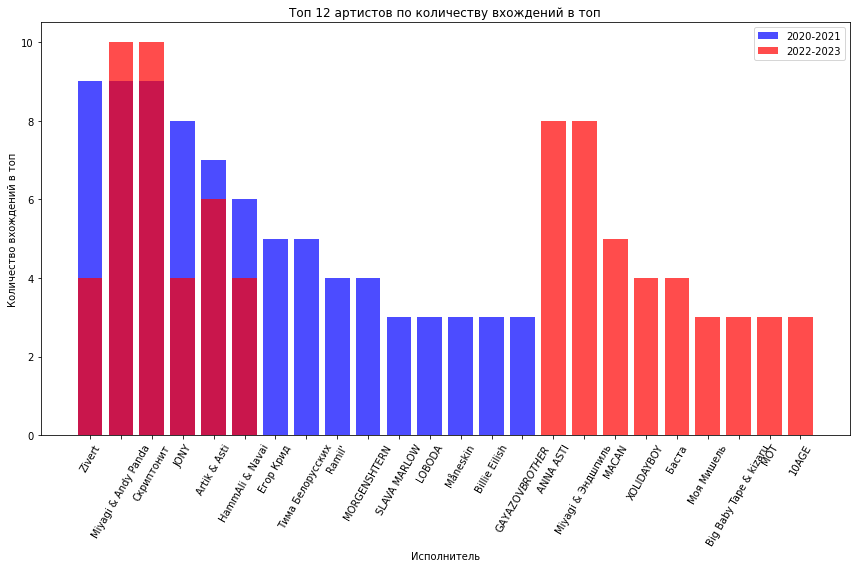

In [87]:
artists_2020_2021 = df_2020_2021['Исполнитель'].value_counts().head(15)
artists_2022_2023 = df_2022_2023['Исполнитель'].value_counts().head(15)

plt.figure(figsize=(12, 8))

# График для 2020-2021 годов
plt.bar(artists_2020_2021.index, artists_2020_2021.values, color='blue', alpha=0.7, label='2020-2021')

# График для 2022-2023 годов
plt.bar(artists_2022_2023.index, artists_2022_2023.values, color='red', alpha=0.7, label='2022-2023')

plt.title('Топ 12 артистов по количеству вхождений в топ')
plt.xlabel('Исполнитель')
plt.ylabel('Количество вхождений в топ')

plt.legend()

plt.xticks(rotation=60)  
plt.tight_layout()  
plt.show()

Так и есть: например, MORGENSHTERN* и SLAVA MARLOW, несмотря на активное творчество в этот временной период, попадали в топ-100 лишь единично; исчезла из главных топов и артистка LOBODA, критиковавшая вторжение России в Украину. На графике отражен "шифт" или смена "топовых" артистов за выбранный период.


В песпективе было бы интересно сопоставить более крупные выгрузки прослушиваний со списками артистов, признанных властями РФ "иностранными агентами", в целях выявить, как наделение статусом "иноагента" может повлиять на характер потребления творческого продукта, создаваемого "иноагентом".

Также, например, на данных с широкой темпоральной рамкой, интересно рассмотрение присутствия "иностранного" в контексте культурных продуктов, в том числе музыкальных, которое может быть использовано для исследования эффективности реализации политик "импортозамещения" в культурной сфере (или, в то же время, эффективности реализации политик развития национального продукта в культурной сфере). 

На основе нашего датасета мы можем посмотреть на количество иностранных текстов в топ-100 за последние годы как своеобразный показатель "распространенности" иностранного культурного продукта.

In [96]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

df_2020_2021['Language'] = df_2020_2021['Текст песни'].apply(detect_language)
df_2022_2023['Language'] = df_2022_2023['Текст песни'].apply(detect_language)

foreign_tracks_2020_2021 = df_2020_2021[df_2020_2021['Language'] != 'ru']
foreign_tracks_2022_2023 = df_2022_2023[df_2022_2023['Language'] != 'ru']

# Вывод результатов
print("Количество треков на иностранных языках в датасете 2020-2021:", len(foreign_tracks_2020_2021))
print("Количество треков на иностранных языках в датасете 2022-2023:", len(foreign_tracks_2022_2023))

Количество треков на иностранных языках в датасете 2020-2021: 39
Количество треков на иностранных языках в датасете 2022-2023: 26


C:\Users\User\AppData\Local\Temp/ipykernel_3032/1080080359.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_2023['Language'] = df_2022_2023['Текст песни'].apply(detect_language)


Как показывает результат анализа, количество треков на иностранных языках действительно уменьшилось в последние два года по сравнению с предыдущими годами. Роль, несомненно, в этом играет и сложность в получении доступа к новинкам иностранной музыки на территории РФ; тем не менее, Apple Music не налагает такие ограничения, а потому мы можем предполагать наличие других факторов в процессе уменьшения доли иностранного контента в музыкальных предпочтениях россиян.

В завершении этого шага можем также рассмотреть разницу в распределении длительности треков по выбранным периодам. Становится заметно, что период 2022-2023 гг. отмечен несколькими выбросами. 

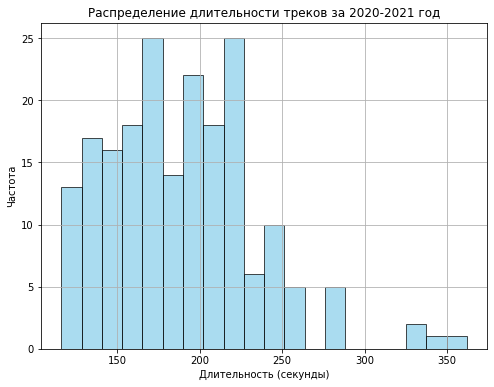

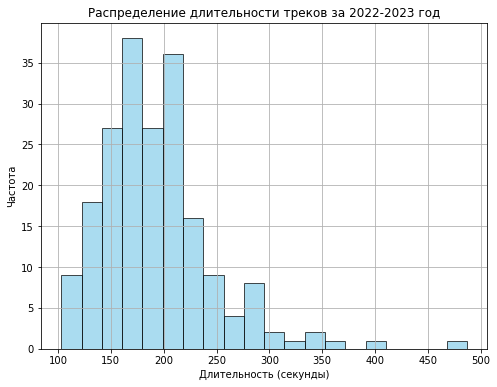

In [90]:
plt.figure(figsize=(8, 6))
plt.hist(df_2020_2021['Длительность'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение длительности треков за 2020-2021 год')
plt.xlabel('Длительность (секунды)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(df_2022_2023['Длительность'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение длительности треков за 2022-2023 год')
plt.xlabel('Длительность (секунды)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

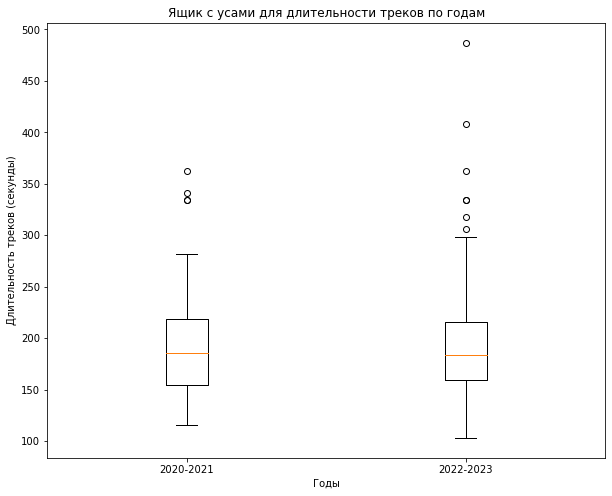

In [91]:
plt.figure(figsize=(10, 8))
plt.boxplot([df_2020_2021['Длительность'], df_2022_2023['Длительность']], labels=['2020-2021', '2022-2023'])
plt.xlabel('Годы')
plt.ylabel('Длительность треков (секунды)')
plt.title('Ящик с усами для длительности треков по годам')
plt.show()

### Шаг 4. Базовый текстовый анализ.

В этом разделе мы предпримем попытку базового текстового анализа собранного нами датасета.

Сначала загрузим необходимые пакеты и инициализируем анализатор.

In [77]:
# Загрузим необходимые для работы пакеты

nltk.download('stopwords') # стоп-слова
nltk.download('punkt') # пунктуационные знаки

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anastasiabojcova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anastasiabojcova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [102]:
stop_words_ru = set(stopwords.words('russian'))
stop_words_en = set(stopwords.words('english'))

# Инициализация морфологического анализатора для русского языка

morph = MorphAnalyzer()

Создадим новый датафрейм и попробуем привести данные в пригодные для токенизации вид. Для начала определим и применим функцию, которая убирает из текста стоп-слова и местоимения, а также приводит все слова к нижнему регистру.

In [114]:
df_text_for_work = data

In [115]:
#Дополнительно включим в наборы стоп слов местоименя, которые при анализе нам не понадобятся
pronouns_ru = {'я', 'это', 'всё', 'все', 'ты', 'он', 'она', 'оно', 'мы', 'вы', 'они', 'себя', 'свой', 'мой', 'твой', 'его', 'ее', 'их', 'наш', 'ваш', 'кто', 'что', 'какой', 'какая', 'какое', 'какие', 'чей', 'чья', 'чье', 'чьи', 'где', 'когда'}
pronouns_en = {'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them', 'myself', 'yourself', 'himself', 'herself', 'itself', 'ourselves', 'yourselves', 'themselves', 'my', 'your', 'his', 'her', 'its', 'our', 'their', 'mine', 'yours', 'hers', 'ours', 'theirs', 'this', 'that', 'these', 'those', 'who'}

# Объединение стоп-слов с местоимениями
stop_words_ru |= pronouns_ru
stop_words_en |= pronouns_en


def clean_text(text):
    
    """Функция clean_text очищает текст от небуквенных символов, выполняет токенизацию 
    и лемматизацию (для русского языка).
    Arguments:
        > text - str - исходный текст для очистки и обработки
    Returns:
        > ' '.join(tokens) - str - очищенный, токенизированный и лемматизированный текст
    Example:
        >>> cleaned_text = clean_text("Ты снова куришь снова слёзы на твоих щеках")
        >>> print(cleaned_text)
        снова курить снова слеза твой щека
    """
        
    text = re.sub(r'[^а-яА-ЯёЁa-zA-Z]', ' ', text)  # Учитываем букву "ё" отдельно
    tokens = []
    for token in word_tokenize(text):
        # Проверка языка токена
        if token.isalpha():
            if token.lower() in stop_words_ru or token.lower() in stop_words_en:
                continue
            if any(char.isalpha() for char in token):  # Проверка на наличие букв
                if any(char in 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя' for char in token.lower()):
                    # Лемматизация для русского языка
                    token = morph.parse(token)[0].normal_form
                tokens.append(token.lower())
    return ' '.join(tokens)

df_text_for_work['cleaned_text'] = df_text_for_work['Текст песни'].apply(clean_text)

In [116]:
df_text_for_work['cleaned_text']

0      снова курить снова слеза твой щека ждать бухой...
1      заходить праздник fuck диджей полный мудак тан...
2      солнце заход басота расход чёрный range sport ...
3      твой роман тяжёлый вид спорт каждый бывший выв...
4      улетать пока атмосфера словно пепел сгорать ул...
                             ...                        
395    беззаботно уходить вдаль наш ты жизнь один дво...
396    тихий слово линия твой губа кругом голова самы...
397    ранний говорить сей ранний говорить сей песенк...
398    пчела пчеловод любим мёд повезти ты повезти пч...
399    thought found way thought found way found neve...
Name: cleaned_text, Length: 400, dtype: object

Перед тем, как продолжать, очистим текст также от местоимений: они перетягивают на себя одеяло при анализе текста и мешают выводу реальных значений. Для того, чтобы убрать их, тоже определим небольшую функцию <font color='blue'>remove_short_words</font>.

In [117]:
def remove_short_words(text):
    tokens = text.split()
    cleaned_tokens = [token for token in tokens if len(token) > 3 and token.lower() not in stop_words_ru and token.lower() not in stop_words_en]
    return ' '.join(cleaned_tokens)

# Применение функции удаления местоимений и коротких слов к столбцу с текстами

df_text_for_work['cleaned_text'] = df_text_for_work['cleaned_text'].apply(remove_short_words)

In [120]:
df_text_for_work['cleaned_text']

0      снова курить снова слеза щека ждать бухой семь...
1      заходить праздник fuck диджей полный мудак тан...
2      солнце заход басота расход чёрный range sport ...
3      роман тяжёлый спорт каждый бывший выводить зон...
4      улетать пока атмосфера словно пепел сгорать ул...
                             ...                        
395    беззаботно уходить вдаль жизнь двое просить за...
396    тихий слово линия губа кругом голова самый гро...
397    ранний говорить ранний говорить песенка лететь...
398    пчела пчеловод любим повезти повезти пчела пче...
399    thought found thought found found never away n...
Name: cleaned_text, Length: 400, dtype: object

Далее используем слова как токены и посчитаем частотность появления лингвистических единиц, к которым мы пришли на предыдущем этапе (значения в элементах столбца ['cleaned_text']). При помощи именной функции <font color='blue'>word_frequency</font> определим 30 самых часто встречающихся слова в текста российских музыкальных топов для каждого выделенного нами периода.

На основании того, что выдаст функция, построим интерактивный график и облака слов для более наглядного сравнения распределения токенов по годам.

In [130]:
def word_frequency(texts):
    words = []
    for text in texts:
        words.extend(text.split())
    return Counter(words)

# Посчитаем частотность слов для каждого периода
freq_2020_2021 = word_frequency(df_2020_2021['cleaned_text'])
freq_2022_2023 = word_frequency(df_2022_2023['cleaned_text'])

# Выведем 20 самых часто встречающихся слов для каждого периода
print("Частотность слов для 2020-2021:")
print(freq_2020_2021.most_common(30))

print("\nЧастотность слов для 2022-2023:")
print(freq_2022_2023.most_common(30))


Частотность слов для 2020-2021:
[('любить', 204), ('любовь', 182), ('хотеть', 169), ('знать', 156), ('просто', 137), ('небо', 110), ('день', 98), ('like', 96), ('глаз', 96), ('говорить', 93), ('найти', 91), ('боль', 91), ('пока', 84), ('сука', 84), ('весь', 83), ('fendi', 81), ('деньга', 80), ('делать', 80), ('девочка', 80), ('новый', 78), ('каждый', 78), ('love', 78), ('сердце', 76), ('душа', 72), ('know', 71), ('снова', 69), ('самый', 69), ('человек', 65), ('стать', 65), ('давать', 65)]

Частотность слов для 2022-2023:
[('любовь', 242), ('знать', 170), ('любить', 143), ('хотеть', 139), ('сердце', 122), ('небо', 122), ('день', 119), ('просто', 102), ('друг', 101), ('деньга', 101), ('снова', 100), ('глаз', 96), ('весь', 95), ('найти', 92), ('мочь', 89), ('каждый', 88), ('сказать', 83), ('душа', 83), ('боль', 82), ('делать', 81), ('танцевать', 80), ('верить', 77), ('like', 76), ('нужный', 74), ('сука', 74), ('рука', 73), ('смотреть', 73), ('видеть', 72), ('мама', 71), ('человек', 70)]


In [132]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=list(frequencies_2020_2021),
    y=list(words_2020_2021),
    orientation='h',
    name='2020-2021',
    marker=dict(color='skyblue')))

fig.add_trace(go.Bar(
    x=list(frequencies_2022_2023),
    y=list(words_2022_2023),
    orientation='h',
    name='2022-2023',
    marker=dict(color='salmon')))

fig.update_layout(
    title='Сравнение частотности слов в разные периоды',
    xaxis=dict(title='Частотность слов'),
    yaxis=dict(title='Слова', autorange='reversed'),
    barmode='group')

fig.show()

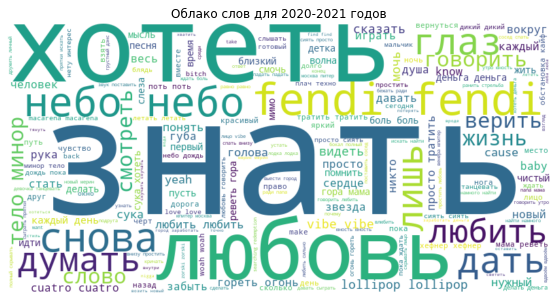

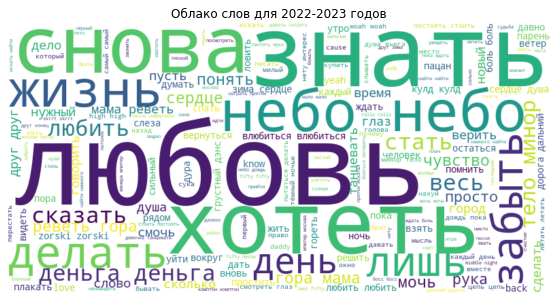

In [122]:
def generate_wordcloud(text, title):
    # Создаем объект WordCloud с шрифтом Arial
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Отображаем облако слов
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Генерация облака слов для df_2020_2021['cleaned_text']
text_2020_2021 = ' '.join(df_2020_2021['cleaned_text'])
generate_wordcloud(text_2020_2021, 'Облако слов для 2020-2021 годов')

# Генерация облака слов для df_2022_2023['cleaned_text']
text_2022_2023 = ' '.join(df_2022_2023['cleaned_text'])
generate_wordcloud(text_2022_2023, 'Облако слов для 2022-2023 годов')


На этом этапе результаты выдачи распределения токенов по годам показывают, что, помимо общих слов ("хотеть", "давать", "день") и широко распространенных сюжетов (например, "любовь"), в период 2022-2023 гг. появляется набор слов, который, при использовании вместе, может символизировать более сложные чувства: например, связанные с ощущением потерянности, отчужденности ("помнить", "забыть", "искать", "ждать") или поиском опоры ("ждать", "рядом", "искать", "верить", "надежный"). 

Попробуем посмотреть, какие темы в текстах выделит модель LDA, которая позволяет нам выделить неявные группы в корпусе слов и на основе этого озвучить предположение о "темах": о том, какие слова употребляются вместе. 

In [147]:
# Создание словаря и корпуса
dictionary_2020_2021 = corpora.Dictionary(df_2020_2021['cleaned_text'].apply(lambda x: x.split()))
corpus_2020_2021 = [dictionary_2020_2021.doc2bow(text.split()) for text in df_2020_2021['cleaned_text']]

dictionary_2022_2023 = corpora.Dictionary(df_2022_2023['cleaned_text'].apply(lambda x: x.split()))
corpus_2022_2023 = [dictionary_2022_2023.doc2bow(text.split()) for text in df_2022_2023['cleaned_text']]

# Обучение модели LDA
num_topics = 5  # Выбор количества тем
lda_model_2020_2021 = LdaModel(corpus_2020_2021, num_topics=num_topics, id2word=dictionary_2020_2021)
lda_model_2022_2023 = LdaModel(corpus_2022_2023, num_topics=num_topics, id2word=dictionary_2022_2023)

In [150]:
# Вывод тем и их распределения
print("Темы в текстах песен 2020-2021 годов:")
for i, topic in lda_model_2020_2021.print_topics(-1):
    print(f"Тема {i}: {topic}")

Темы в текстах песен 2020-2021 годов:
Тема 0: 0.015*"любить" + 0.007*"хотеть" + 0.006*"тело" + 0.005*"минор" + 0.005*"танцевать" + 0.005*"найти" + 0.005*"равно" + 0.005*"девочка" + 0.004*"день" + 0.004*"гореть"
Тема 1: 0.009*"cuatro" + 0.008*"хотеть" + 0.006*"сука" + 0.005*"любовь" + 0.005*"тратить" + 0.004*"find" + 0.004*"море" + 0.004*"просто" + 0.004*"дикий" + 0.004*"москва"
Тема 2: 0.014*"небо" + 0.006*"боль" + 0.006*"любить" + 0.005*"love" + 0.005*"найти" + 0.005*"весь" + 0.005*"пока" + 0.005*"мочь" + 0.005*"делать" + 0.004*"знать"
Тема 3: 0.010*"любовь" + 0.010*"fendi" + 0.008*"знать" + 0.007*"хотеть" + 0.005*"любить" + 0.005*"мама" + 0.005*"lollipop" + 0.005*"пока" + 0.005*"глаз" + 0.004*"просто"
Тема 4: 0.010*"просто" + 0.008*"любить" + 0.007*"сиять" + 0.007*"любовь" + 0.007*"знать" + 0.006*"vibe" + 0.006*"деньга" + 0.006*"like" + 0.005*"новый" + 0.005*"know"


In [151]:
print("Темы в текстах песен 2022-2023 годов:")
for i, topic in lda_model_2022_2023.print_topics(-1):
    print(f"Тема {i}: {topic}")

Темы в текстах песен 2022-2023 годов:
Тема 0: 0.008*"любовь" + 0.007*"знать" + 0.005*"хотеть" + 0.005*"просто" + 0.005*"друг" + 0.005*"смотреть" + 0.005*"любить" + 0.004*"день" + 0.004*"глаз" + 0.004*"сердце"
Тема 1: 0.008*"найти" + 0.006*"знать" + 0.005*"ночь" + 0.005*"день" + 0.004*"глаз" + 0.004*"любовь" + 0.004*"искать" + 0.004*"хотеть" + 0.004*"весь" + 0.004*"сердце"
Тема 2: 0.009*"любовь" + 0.007*"хотеть" + 0.005*"love" + 0.005*"делать" + 0.005*"знать" + 0.005*"танцевать" + 0.005*"любить" + 0.005*"нужный" + 0.005*"сердце" + 0.005*"друг"
Тема 3: 0.015*"небо" + 0.012*"любовь" + 0.009*"любить" + 0.007*"мочь" + 0.006*"боль" + 0.006*"день" + 0.006*"реветь" + 0.006*"знать" + 0.005*"гора" + 0.005*"money"
Тема 4: 0.011*"деньга" + 0.006*"любовь" + 0.005*"снова" + 0.005*"кулд" + 0.005*"come" + 0.005*"каждый" + 0.005*"знать" + 0.004*"really" + 0.004*"high" + 0.004*"сердце"


К сожалению, компьютерная модель не позволяет нам сделать дополнительных выводов, кроме уже озвученных (например, концентрация определенных слов вокруг тем "любви" или кластера "тусовки). Вероятно, корпус слов слишком мал для того, чтобы модель могла подвердить или опровергнуть наши предположения о "неопределенности" или "поиске опоры" как одной из тем музыкальных произведений, которые составляют российские топы в последние годы.

Мы рекомендуем попробовать воспроизвести этот код на большей выборке песен. Вместе с ним можно будет более детально рассмотреть также распределение сентимента (настрояния) текста (нами определено через функцию <font color='blue'>analyze_sentiment</font>. 

In [152]:
def analyze_sentiment(text):
    '''
    Функция для анализа сентимента текста.
    Возвращает:
        - 'positive', если текст положительный,
        - 'negative', если текст отрицательный,
        - 'neutral', если текст нейтральный.
    '''
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Применяем функцию к столбцу с текстами песен в каждом периоде
df_2020_2021['sentiment'] = df_2020_2021['cleaned_text'].apply(analyze_sentiment)
df_2022_2023['sentiment'] = df_2022_2023['cleaned_text'].apply(analyze_sentiment)

# Считаем количество текстов с каждым сентиментом в каждом периоде
sentiment_counts_2020_2021 = df_2020_2021['sentiment'].value_counts()
sentiment_counts_2022_2023 = df_2022_2023['sentiment'].value_counts()

# Выводим результаты
print("Распределение сентимента текстов песен в периоде 2020-2021:")
print(sentiment_counts_2020_2021)

print("\nРаспределение сентимента текстов песен в периоде 2022-2023:")
print(sentiment_counts_2022_2023)


Распределение сентимента текстов песен в периоде 2020-2021:
neutral     146
positive     32
negative     22
Name: sentiment, dtype: int64

Распределение сентимента текстов песен в периоде 2022-2023:
neutral     152
positive     29
negative     19
Name: sentiment, dtype: int64


C:\Users\User\AppData\Local\Temp/ipykernel_3032/4227295385.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp/ipykernel_3032/4227295385.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Выводы

На основе собранных нами данных мы провели краткий сравнительный анализ периодов 2020-2021 и 2022-2023, в качестве границы между периодами задав социально-политические изменения 2022 года. Несмотря на достаточно небольшую выборку песен, которая была положена в основу датасета, в рамках данного исследования получилось вывить изменения в зарактеристиках произведений, вошедших в музыкальные ТОП-100 в России в последние года. Среди них:
- увеличение числе треков, в которых наличествует ненормативный конент,
- уменьшение числа треков на иностранных языках,
- "шифт" топовых артистов от иностранных к российским,
- снижение популярности лиц, признанных "иноагентами".

Для дальнеьшего уточнения и расширения валидности выводов, ровно как и для достижения поставленной перед данным датасетом цели (`Как изменились музыкальные предпочтения российского слушателя на фоне социально-политических событий последних лет?`) нами предлагается проведение полноценного исследования на более широкой выборке данных, которое опиралось бы на собранные нами данные и предложенные методы анализа как на "пилотный" проект. 